<a href="https://colab.research.google.com/github/Aiden-Ross-Dsouza/Natural-Language-Processing/blob/main/Word2Vec/notebooks/Word2Vec_Skim_Gram_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px

# Prepare Corpus

In [2]:
corpus = "Cell phones have gone from a sought-after luxury to a daily necessity. While these devices provide convenient access to the outside world, they can be problematic for educators. High school teachers can tell children in their classes to put their phones away, but should professors have the same control over adult men and women? The key is to create cell phone usage policies that limit distractions without hindering student rights. The primary argument supporting cell phone control in the classroom is the fact that phones can be distracting. Not only do cell phones distract instructors, but they may also distract students trying to pay attention to the lecture. This is the same effect as a moviegoer looking at his phone in a theater. Even if the phone makes no noise, the light from the screen is enough to catch someone's attention. Arguments against cell phone control typically focus on safety concerns. Should a crisis occur in the classroom, students should have their phones on hand to make a call. If a student has a child, he or she may need a phone in case of a medical emergency. If the student is on call for work, he or she will need access to a phone. The list of exceptionworthy scenarios is endless. The best solution is to create cell phone usage rules that allow devices to be accessible without disturbing other students' educational opportunities. Students should be permitted to keep their phones in their bags, pockets, or other belongings as long as the phones are on silent in class. Vibrate settings may be permitted if the instructor does not believe it will distract him or her, since the noise of the vibration may not be noticeable in a large classroom. If a student needs to answer the phone during an emergency, he or she can step out of the classroom to do so. This setup would give the students and the instructor peace of mind. Cell phone restrictions in classrooms should also include specific disciplinary actions for breaking the rules. If a student is caught using the phone in class, he or she should be excused for the rest of the day. Professors should refrain from physically taking possession of a student's phone because of liability conflicts. If the phone is damaged while in the professor's possession, the school or the instructor could be held responsible for the repairs. It is safer to ask the student to leave the classroom than it is to take the phone away completely. Each school, professor and student body is different. Colleges must adapt their rules and discipline efforts to reflect the current needs of their students. Eliminating cell phones in college classrooms is an overstretch, but there are ways to balance students' rights and instructors' rights. With the right amount of control and flexibility, colleges can create a pleasant learning environment with maximum safety and minimal interruptions."
corpus = corpus.replace(',','')
corpus = corpus.replace('\'','')
corpus = corpus.replace('?','')
corpus = corpus.split('.')
print(corpus)

['Cell phones have gone from a sought-after luxury to a daily necessity', ' While these devices provide convenient access to the outside world they can be problematic for educators', ' High school teachers can tell children in their classes to put their phones away but should professors have the same control over adult men and women The key is to create cell phone usage policies that limit distractions without hindering student rights', ' The primary argument supporting cell phone control in the classroom is the fact that phones can be distracting', ' Not only do cell phones distract instructors but they may also distract students trying to pay attention to the lecture', ' This is the same effect as a moviegoer looking at his phone in a theater', ' Even if the phone makes no noise the light from the screen is enough to catch someones attention', ' Arguments against cell phone control typically focus on safety concerns', ' Should a crisis occur in the classroom students should have thei

In [3]:
def tokenize_corpus(corpus):
    tokens = [x.split() for x in corpus]
    return tokens

tokenized_corpus = tokenize_corpus(corpus)
print(tokenized_corpus)

[['Cell', 'phones', 'have', 'gone', 'from', 'a', 'sought-after', 'luxury', 'to', 'a', 'daily', 'necessity'], ['While', 'these', 'devices', 'provide', 'convenient', 'access', 'to', 'the', 'outside', 'world', 'they', 'can', 'be', 'problematic', 'for', 'educators'], ['High', 'school', 'teachers', 'can', 'tell', 'children', 'in', 'their', 'classes', 'to', 'put', 'their', 'phones', 'away', 'but', 'should', 'professors', 'have', 'the', 'same', 'control', 'over', 'adult', 'men', 'and', 'women', 'The', 'key', 'is', 'to', 'create', 'cell', 'phone', 'usage', 'policies', 'that', 'limit', 'distractions', 'without', 'hindering', 'student', 'rights'], ['The', 'primary', 'argument', 'supporting', 'cell', 'phone', 'control', 'in', 'the', 'classroom', 'is', 'the', 'fact', 'that', 'phones', 'can', 'be', 'distracting'], ['Not', 'only', 'do', 'cell', 'phones', 'distract', 'instructors', 'but', 'they', 'may', 'also', 'distract', 'students', 'trying', 'to', 'pay', 'attention', 'to', 'the', 'lecture'], ['Thi

# Build Vocabulary

In [4]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)

print(word2idx)
print(idx2word)
print(vocabulary_size)

{'Cell': 0, 'phones': 1, 'have': 2, 'gone': 3, 'from': 4, 'a': 5, 'sought-after': 6, 'luxury': 7, 'to': 8, 'daily': 9, 'necessity': 10, 'While': 11, 'these': 12, 'devices': 13, 'provide': 14, 'convenient': 15, 'access': 16, 'the': 17, 'outside': 18, 'world': 19, 'they': 20, 'can': 21, 'be': 22, 'problematic': 23, 'for': 24, 'educators': 25, 'High': 26, 'school': 27, 'teachers': 28, 'tell': 29, 'children': 30, 'in': 31, 'their': 32, 'classes': 33, 'put': 34, 'away': 35, 'but': 36, 'should': 37, 'professors': 38, 'same': 39, 'control': 40, 'over': 41, 'adult': 42, 'men': 43, 'and': 44, 'women': 45, 'The': 46, 'key': 47, 'is': 48, 'create': 49, 'cell': 50, 'phone': 51, 'usage': 52, 'policies': 53, 'that': 54, 'limit': 55, 'distractions': 56, 'without': 57, 'hindering': 58, 'student': 59, 'rights': 60, 'primary': 61, 'argument': 62, 'supporting': 63, 'classroom': 64, 'fact': 65, 'distracting': 66, 'Not': 67, 'only': 68, 'do': 69, 'distract': 70, 'instructors': 71, 'may': 72, 'also': 73, 's

# Skip Gram Model

In [5]:
window_size = 5
idx_pairs = []

for sentence in tokenized_corpus:
    indices = [word2idx[word] for word in sentence]
    for center_word_pos in range(len(indices)):
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs)
print(idx_pairs)

[[  0   1]
 [  0   2]
 [  0   3]
 ...
 [232 102]
 [232  44]
 [232 231]]


In [6]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x
get_input_layer(1)

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

# Hyperparameters

In [7]:
embedding_dims = 10
W1 = torch.tensor(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True) #Size = [embedding_dims, vocabulary_size]
W2 = torch.tensor(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True) #Size = [vocabulary_size, embedding_dims]
num_epochs = 1000
learning_rate = 0.001

no_epochs = []
loss_plot = []

<ipython-input-7-419a27758e19>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  W1 = torch.tensor(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True) #Size = [embedding_dims, vocabulary_size]
<ipython-input-7-419a27758e19>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  W2 = torch.tensor(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True) #Size = [vocabulary_size, embedding_dims]


# Train

In [8]:
for epo in range(num_epochs):
    loss_val = 0
    for data, target in idx_pairs:
        x = torch.tensor(get_input_layer(data)).float() #Size = vocabulary_size
        y_true = torch.tensor(torch.from_numpy(np.array([target])).long()) #Size = 1

        z1 = torch.matmul(W1, x) #Size = embedding_dims
        z2 = torch.matmul(W2, z1) #Size = vocabulary_size

        log_softmax = torch.nn.functional.log_softmax(z2, dim=0) #Size = vocabulary_size
        loss = torch.nn.functional.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.item() #loss_val is a scalar
        loss.backward()
        W1.data -= learning_rate * W1.grad.data #Size = [embedding_dims, vocabulary_size]
        W2.data -= learning_rate * W2.grad.data #Size = [vocabulary_size, embedding_dims]
        W1.grad.data.zero_()
        W2.grad.data.zero_()
    if (epo+1) % 50 == 0:
        print(f'Loss at epo {epo+1}: {loss_val/len(idx_pairs)}')
        no_epochs.append(epo)
        loss_plot.append(loss_val/len(idx_pairs))

<ipython-input-8-3619119c92e1>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(get_input_layer(data)).float() #Size = vocabulary_size
<ipython-input-8-3619119c92e1>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(torch.from_numpy(np.array([target])).long()) #Size = 1


Loss at epo 50: 5.7174518419604
Loss at epo 100: 5.058118085012647
Loss at epo 150: 4.745034588396256
Loss at epo 200: 4.542356612837961
Loss at epo 250: 4.385289305301723
Loss at epo 300: 4.253879407356525
Loss at epo 350: 4.142973915784817
Loss at epo 400: 4.05006721052043
Loss at epo 450: 3.9727422255453804
Loss at epo 500: 3.9085896501840627
Loss at epo 550: 3.85546876798416
Loss at epo 600: 3.8114346489677287
Loss at epo 650: 3.774654372498907
Loss at epo 700: 3.7435433159320812
Loss at epo 750: 3.716868259460468
Loss at epo 800: 3.6937253716690788
Loss at epo 850: 3.6734524219494147
Loss at epo 900: 3.6555538554496954
Loss at epo 950: 3.639634113799175
Loss at epo 1000: 3.6253814947722582


Text(0, 0.5, 'loss')

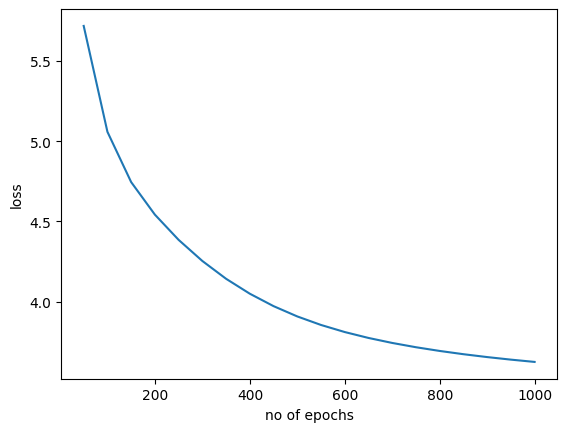

In [9]:
plt.plot(no_epochs, loss_plot)
plt.xlabel('no of epochs')
plt.ylabel('loss')

# PCA plot of 4 random words from the corpus

In [10]:
plot_words = ["phones", "school", "students", "safety", "rules"]

word_matrix = np.array([W2[word2idx[word]].detach().numpy() for word in plot_words])
# The word vector retrieved from a Word2Vec model using the code model.wv[word] does not refer to one-hot vectors. Instead, it refers to dense, distributed word embeddings that capture the semantic meaning of words based on the context in which they appear in a large corpus of text. In contrast, word embeddings produced by Word2Vec models are dense vectors of real numbers with a fixed dimensionality, typically ranging from 50 to 300 dimensions. These word vectors are learned through unsupervised training on a large corpus of text and capture the semantic relationships between words based on the context in which they co-occur. Each dimension of the word vector represents a different aspect of the word's meaning, and similar words have similar vector representations in the embedding space.
num_components = 3
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(word_matrix)
pca_result

array([[-0.73717684, -1.3337811 ,  1.8421909 ],
       [-0.6104261 ,  2.3817992 ,  0.15029307],
       [-2.258447  , -1.4110056 , -1.3704572 ],
       [ 3.5840755 , -0.76471037, -0.45806494],
       [ 0.02197393,  1.1276983 , -0.1639615 ]], dtype=float32)

In [11]:
data = {
    'x': pca_result[:, 0],
    'y': pca_result[:, 1],
    'z': pca_result[:, 2],
    'word': plot_words
}

fig = px.scatter_3d(data, x='x', y='y', z='z', text='word')

fig.update_traces(marker=dict(size=8))

fig.show()

# PCA plot of words similar to phone in the corpus

In [14]:
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

target = "phone"
word_vector_target = W2[word2idx[target]].detach().numpy()
similar_words = [target]
for i in range(vocabulary_size):
    if idx2word[i] == target:
        continue
    else:
        word_vector_current = W2[i].detach().numpy()
        similarity = cosine_similarity(word_vector_current, word_vector_target)
        #print(idx2word[i] + ":", similarity)
        if similarity> 0.7:
          similar_words.append(idx2word[i])

print(similar_words)
word_matrix2 = np.array([W2[word2idx[word]].detach().numpy() for word in similar_words])
num_components = 3  # Number of principal components to keep
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(word_matrix2)

data = {
    'x': pca_result[:, 0],
    'y': pca_result[:, 1],
    'z': pca_result[:, 2],
    'word': similar_words
}

fig = px.scatter_3d(data, x='x', y='y', z='z', text='word')

fig.update_traces(marker=dict(size=8))

fig.show()

['phone', 'a', 'cell', 'classroom']


# PCA plot of corpus

In [15]:
word_matrix2 = np.array([W2[word2idx[word]].detach().numpy() for word in vocabulary])
num_components = 3
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(word_matrix2)

data = {
    'x': pca_result[:, 0],
    'y': pca_result[:, 1],
    'z': pca_result[:, 2],
    'word': vocabulary
}

fig = px.scatter_3d(data, x='x', y='y', z='z', text='word')

fig.update_traces(marker=dict(size=8))

fig.show()

# Evaluating Word Embeddings with Analogies

['men', 'women', 'phone', 'cell']
PCA Vectors: 
[[-2.125269   -0.3881171 ]
 [-2.5132918   0.07537173]
 [ 2.7831354  -1.3104275 ]
 [ 1.8554251   1.6231729 ]]


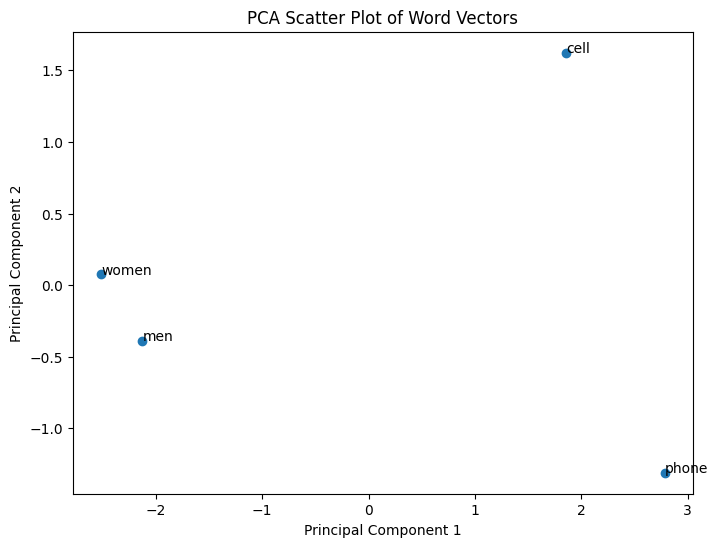

In [22]:
words = ["men", "women", "phone"]

target_vector = W2[word2idx[words[1]]].detach().numpy() - W2[word2idx[words[0]]].detach().numpy() + W2[word2idx[words[2]]].detach().numpy()
highest_similarity = -1

for i in range(vocabulary_size):
      word_vector_current = W2[i].detach().numpy()
      if np.array_equal(word_vector_current, W2[word2idx[words[2]]].detach().numpy()):
        continue
      similarity = cosine_similarity(word_vector_current, target_vector)
      if similarity> highest_similarity:
        highest_similarity = similarity
        predicted = idx2word[i]

words.append(predicted)
print(words)

word_matrix = np.array([W2[word2idx[word]].detach().numpy() for word in words])
num_components = 2
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(word_matrix)
print("PCA Vectors: \n" + str(pca_result))
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], marker='o')

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot of Word Vectors")

plt.show()